In [0]:
#데이터 불러오기 및 합치기
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/Salaries.csv')
df16 = df[df.yearID==2016]
import pandas as pd
people=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/People.csv')
df16_people = pd.merge(df16,people,how='inner',on='playerID')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


문제1. 2019년 선수들의 소속 리그 빈도표를 구하시오.

In [0]:
df16_people['lgID'].value_counts()

NL    432
AL    421
Name: lgID, dtype: int64

문제2. 리그별 선수연봉의 평균을 출력하시오.

In [0]:
df_mean = df16_people.groupby('lgID')['salary'].mean()
df_mean[1]

4013890.4421296297

문제3. 2016년 MLB선수 총연봉, 리그 연봉 평균을 출력하시오.

In [0]:
print('전체 평균 = ',df16_people.salary.mean(),'AL리그 평균 = ',df_mean[0],'NL리그 평균 = ',df_mean[1])

전체 평균 =  4396409.603751466 AL리그 평균 =  4788923.327790974 NL리그 평균 =  4013890.4421296297


문제4. df16_people 데이터를 train(훈련), test data(검증) 7:3 분할하시오.

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df16_people, test_size = 0.95)
print(train.shape,'***',test.shape)

(42, 28) *** (811, 28)


문제5. 훈련 데이터를 이용하여 2016년 MLB선수 전체 연봉평균을 (점)추정하시오.

In [0]:
train.salary.mean()

4253641.554438861

문제6. 훈련 데이터의 선수연봉 히스토그램을 그리시오.

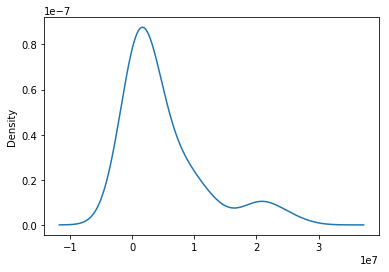

In [0]:
train.salary.plot.kde()

문제7. 2016 MLB 선수 연봉평균 95% 신뢰구간을 구하시오.

In [0]:
import math
lower=train.salary.mean()-1.96*train.salary.std()/math.sqrt(42)
upper=train.salary.mean()+1.96*train.salary.std()/math.sqrt(42)
print('하한',train.salary.mean()-1.96*train.salary.std()/math.sqrt(42),'상한',train.salary.mean()+1.96*train.salary.std()/math.sqrt(42))

하한 3029160.898290244 상한 6921515.101709756


In [0]:
(lower+upper)/2 == train.salary.mean()

True

문제8. 모집단 평균은 4,396,409이다. 유의수준 5%에서 점정하시오.
결론: 모평균은 4,396,409이다.